In [29]:
import tensorflow as tf
import keras

In [30]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [31]:
nb_classes = 10 # 類別的數目
x_train_image = x_train_image.reshape(60000, 784).astype('float32')
x_test_image = x_test_image.reshape(10000, 784).astype('float32')
x_train_image /= 255
x_test_image /= 255
y_train_cat = np_utils.to_categorical(y_train_label, nb_classes)
y_test_cat = np_utils.to_categorical(y_test_label, nb_classes)
model = Sequential()
model.add(Dense(50, input_shape=(784,)))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.9829 - accuracy: 0.7515
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5128 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.4309 - accuracy: 0.8823
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3935 - accuracy: 0.8908
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3713 - accuracy: 0.8960
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3561 - accuracy: 0.9004
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3450 - accuracy: 0.9028
Epoch 8/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3364 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3296 - accuracy: 0.9073
Epoch 10/10
60000/60000 [==============================

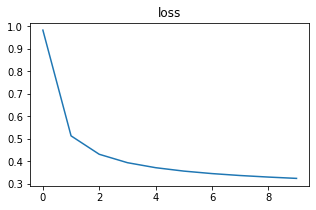

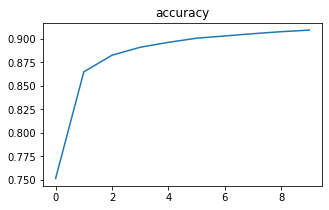

In [32]:
epochs = 10
history = model.fit(x_train_image,
                    y_train_cat,
                    epochs=epochs,
                    batch_size=128,
                    verbose=1)
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');
scores = model.evaluate(x_test_image, y_test_cat, verbose=2)
print("accuracy:", scores[1]*100, "%")